<div style="position: relative; width: 100%; height: 14vh" >
  <img src="img/isw.png" style="position: absolute; right: 0px" width="50%" >
</div>

# Data Science in der Produktion 
## Uebung 2: Modellbildung

# Inhaltsverzeichnis
1. [Einfuehrung](#einfuehrung)
     1. [Lernziel der Uebung](#lernziel)
     2. [Installation benötigter Bibliotheken](#installation)
     3. [Kurzbeschreibung der Software-Bibliotheken](#kurzbeschreibung)
2. [Supervised Learning](#supervised)
    1. [Klassifikation und Regression](#klassifikation)
    2. [Generalisierung, Overfitting und Underfitting](#generalisierung)
    3. [Algorithmen](#algorithmen)
        1. [k-Nearest-Neighbors (k-NN)](#knn)
        2. [Lineare Modelle](#linear)
        3. [Decision Trees](#decision)
3. [Vorbereitungsaufgabe](#vorbereitung)
4. [Versuchsdurchführung](#versuch)
    1. [Aufgabe 1](#a1)
    2. [Aufgabe 2](#a2)
    3. [Aufgabe 3](#a3)


## 1. Einfuehrung <a name="einfuehrung"></a>

Data Science gewinnt in der Produktionstechnik eine immer größere Bedeutung, da der Zugang zu Daten durch eine gestiegene Konnektivität von u.a. Produktionsanlagen einfacher wird und die Performance der Computer in den letzten Jahren gestiegen ist. Für ein strukturiertes Vorgehen im Bereich des Data Science wurde in der Vorlesung das CRISP-Modell (Cross-industry standard process for data mining) vorgestellt. Dieses Modell soll anhand des in der Vorlesung vorgestellten Anwendungsfalls (Block C, CRISP Phase 1) in den Übungen praktisch eingeführt, verstanden und bearbeitet werden.
Beim Anwendungsfall einer Kleinserienfertigung am ISW werden acht Varianten eines Produkts nach Kundenwunsch an einer Montagelinie angefertigt. Auf Kundenwunsch landet die Bestellung im Auftragssystem und wird je nach Auslastung der Linie in kürzester Zeit gefertigt. Die Bestellzahl liegt bei ca. 12000 Bestellungen pro Jahr, wobei der Reingewinn 0,75€ pro Bestellung beträgt. Zahlreiche Stationen, die unterschiedliche Fähigkeiten besitzen und zur Produktion der Teile beitragen, sind in der Anlage untergebracht.
In den letzten Monaten häuften sich die Beschwerden von Kunden über Ausfälle des Produkts im Feldeinsatz. Dadurch sank die Anzahl der Bestellungen auf 800 Produkte im Monat. Das bedeutet 20% weniger als zuvor und somit auf das Jahr gerechnet 1800€ weniger Gewinn. Das Problem muss gefunden werden, um wieder die ursprüngliche Anzahl an Bestellungen pro Jahr zu erreichen.
In der Vorlesung wurde die erste Phase des CRISP-Modells durchgeführt (Block C, CRISP Phase 1) und das Data Science Ziel definiert. Mit den vorhandenen Sensoren an der Anlage muss identifiziert werden, ob das Produkt ein Qualitätsproblem hat oder nicht. In dieser Übung werden die beiden nächsten Phasen des CRIPS-Modells (Datenverständnis und Datenvorbereitung) am Anwendungsfall durchgeführt.




### 1.1 Lernziel der Übung <a name="lernziel"></a>

Die Übung vermittelt Kenntnisse der Modellbildung im Bereich Supervised Learning.
Sie kennen den grundelegenden Unterschied zwischen Klassifikation und Regression. Weiter können Sie evaluieren wann ein Problem durch eine Klassifikation bzw. Regression gelöst werden kann. Es wird vermittelt inwiefern die Modellkomplexität mit Overfitting bzw. Underfitting korelliert.

Sie lernen drei beliebte Algorithmen kennen. Die Algorithmen werden jeweils als Klassifikator bzw. Regressor eingeführt. Im weiteren werden die Stärken, Schwächen und Parameter der Algorithmen verdeutlicht. Sodass Sie für ein Machine-Learning Problem den optimalen Algorithmus auswählen können. Ihnen wird vermittelt wie die trainierten Modelle visualisiert werden und auf Genauigkeit, Generalisierungsleistung und Performanz untersucht werden können.

### 1.2 Installation benötigter Bibliotheken <a name="installation"></a>

Die benötigten Python-Bibliotheken können mit dem folgenden Befehl auf dem Host des Jupyter Servers installiert werden. Durch den --user Paramater werden die Pakete nur für den angemeldeten Benutzer installiert. Die Installation kann einige Minuten dauern.

In [ ]:
%%bash
pip3 install numpy scipy matplotlib ipython scikit-learn pandas --user

### 1.3 Kurzbeschreibung der Software-Bibliotheken <a name="kurzbeschreibung"></a>

Scikit-learn

Scikit-learn ist ein Open-Source-Projekt, d.h. der Quellcode ist öffentlich einsehbar und kann ohne kann kostenlos verwendet werden. Das scikit-learn-Projekt wird ständig weiterentwickelt und verbessert und hat eine sehr aktive Nutzergemeinde. Es enthält eine Reihe modernster maschineller Lernalgorithmen sowie eine umfassende Dokumentation zu jedem Algorithmus. Scikit-learn ist ein sehr beliebtes Werkzeug und die führende Python-Bibliothek für Machine Learning. Es ist in der Industrie und Wissenschaft weit verbreitet. Scikit-learn funktioniert gut mit einer Reihe anderer wissenschaftlicher Python-Tools, auf die später in diesem Kapitel eingegangen wird. Es wird empfohlen auch das Scikit-learn Benutzerhandbuch und die API-Dokumentation zu lesen, um weitere Details und viele weitere Optionen für die verschiedenen Algorithmen zu erhalten.


In der gesamten Übung werden die Bibliotheken NumPy, Matplotlib, Scipy, Pandas und Scikit-Learn verwendet. Der gesamte Code geht von folgenden Importen aus:

In [5]:
from IPython.display import display, Math, Latex
import numpy as np
import matplotlib.pyplot as plt
import mglearn
import numpy as np
import sklearn

Es wird davon ausgegangen, dass der Code in einem Jupyter-Notebook ausgeführt wird. Weiter wird empfohlen im Jupyter-Notebook die Option %matplotlib inline zu aktivieren. Dadurch ist gewährleistet, dass Plots direkt im Notebook angezeigt werden. Andernfalls muss die Funktion plt.show() aufgerufen werden, um tatsächlich einen Plots anzuzeigen.

Jupyter Notebook 

Das Jupyter Notebook ist eine interaktive Umgebung zum Ausführen von Code im Browser. Es ist ein großartiges Werkzeug für die explorative Datenanalyse und wird von Datenwissenschaftlern häufig verwendet. Während das Jupyter Notebook viele Programmiersprachen unterstützt, benötigen wir nur die Python-Unterstützung. Das Jupyter Notebook macht es einfach, Code, Text und Bilder einzubinden, und all dieses Buch wurde tatsächlich als Jupyter Notebook geschrieben. Alle von uns mitgelieferten Codebeispiele können von GitHub heruntergeladen werden.


NumPy  

NumPy ist eines der grundlegenden Pakete für wissenschaftliches Rechnen in Python. Es enthält Funktionen für multidimensionale Arrays, mathematische Funktionen auf hohem Niveau wie lineare Algebraoperationen und die Fourier-Transformation sowie Pseudozufallszahlengeneratoren. Im scikit-learn ist das NumPy-Array die grundlegende Datenstruktur. scikit-learn nimmt Daten in Form von NumPy-Arrays auf. Alle Daten, die Sie verwenden, müssen an ein NumPy-Array übergeben werden. Die Kernfunktionalität von NumPy ist die Klasse ndarray, ein multidimensionales (n-dimensionales) Array. Alle Elemente des Arrays müssen vom gleichen Typ sein. Ein NumPy-Array sieht so aus:

In [6]:
import numpy as np
x = np.array([[1, 2, 3], [4, 5, 6]])
print("x:\n{}".format(x))

x:
[[1 2 3]
 [4 5 6]]


Wir werden NumPy in diesem Buch viel verwenden, und wir werden auf Objekte der NumPy ndarray-Klasse als "NumPy-Arrays" oder einfach als "Arrays" verweisen.

SciPy  

SciPy ist eine Sammlung von Funktionen für das wissenschaftliche Rechnen in Python. Es bietet unter anderem fortschrittliche lineare Algebra-Routinen, mathematische Funktionsoptimierung, Signalverarbeitung, spezielle mathematische Funktionen und statistische Verteilungen. scikit-learn bezieht sich auf SciPys Sammlung von Funktionen zur Implementierung seiner Algorithmen. Der wichtigste Teil von SciPy für uns ist scipy.sparse: Dies liefert spärliche Matrizen, die eine weitere Darstellung sind, die für Daten in scikit\x02learn verwendet wird. Sparse Matrizen werden immer dann verwendet, wenn wir ein 2D-Array speichern wollen, das meist Nullen enthält:

In [7]:
from scipy import sparse
# Create a 2D NumPy array with a diagonal of ones, and zeros everywhere else
eye = np.eye(4)
print("NumPy array:\n{}".format(eye))


NumPy array:
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [8]:
# Convert the NumPy array to a SciPy sparse matrix in CSR format
# Only the nonzero entries are stored
sparse_matrix = sparse.csr_matrix(eye)
print("\nSciPy sparse CSR matrix:\n{}".format(sparse_matrix))


SciPy sparse CSR matrix:
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


Normalerweise ist es nicht möglich, dichte Darstellungen von spärlichen Daten zu erstellen (da sie nicht in den Speicher passen würden), also müssen wir spärliche Darstellungen direkt erstellen. Hier ist eine Möglichkeit, die gleiche spärliche Matrix wie bisher im COO-Format zu erstellen:


In [9]:
data = np.ones(4)
row_indices = np.arange(4)
col_indices = np.arange(4)
eye_coo = sparse.coo_matrix((data, (row_indices, col_indices)))
print("COO representation:\n{}".format(eye_coo))

COO representation:
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


Weitere Details zu SciPy Sparse Matrizen finden Sie in den SciPy Vorlesungsunterlagen.


Matplotlib  

Matplotlib ist die primäre wissenschaftliche Plottbibliothek in Python. Es bietet Funktionen zur Erstellung von Visualisierungen in Publikationsqualität, wie z.B. Liniendiagramme, Histogramme, Streudiagramme usw. Die Visualisierung der Daten und verschiedener Modelle kann wichtige Erkenntnisse liefern. Im Rahmen der Uebung wird ausschließlich Matplotlib für Visualisierungen eingesetzt. Wenn Sie im Jupyter Notebook arbeiten, können Sie Matplotlib-Visualisierungen direkt im Browser anzeigen, indem Sie die Befehle %matplotlib notebook und %matplotlib inline verwenden. Es wird die Verwendung von %matplotlib Notebooks empfohlen, da es eine interaktive Umgebung bietet. Im folgenden befindet sich Code zu einer beispielhaften Darstellung einer Sinus-Kurve visualisiert durch Matplotlib (vgl. Abbildung 1-1):

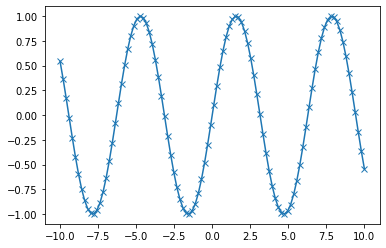

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
# Generate a sequence of numbers from -10 to 10 with 100 steps in between
x = np.linspace(-10, 10, 100)
# Create a second array using sine
y = np.sin(x)
# The plot function makes a line chart of one array against another
plt.plot(x, y, marker="x")

Abbildung 1-1. Einfaches Linienplot der Sinusfunktion mit matplotlib

Pandas  

Pandas ist eine Python-Bibliothek für Datenbereitstellung und Analyse. Es basiert auf einer Datenstruktur namens DataFrame, die nach dem R DataFrame aufgebaut ist. Einfach ausgedrückt, ist ein Pandas DataFrame eine Tabelle, ähnlich einer Excel-Tabelle. Pandas bietet eine Vielzahl von Methoden, um diese Tabelle zu modifizieren und zu bearbeiten; insbesondere erlaubt es SQL-ähnliche Abfragen und Joins von Tabellen. Weiter erlaubt Pandas, dass jede Spalte eines Arrays einen eigenen Datentyp (z.B. ganze Zahlen, Datum, Gleitkommazahlen und Zeichenketten) hat. Ein weiteres wertvolles Werkzeug von Pandas ist die Möglichkeit, aus einer Vielzahl von Dateiformaten und Datenbanken wie SQL-, Excel- und CSV-Dateien (Comma Separated Values) zu übernehmen. Im Folgenden ist ein Beispiel für die Erstellung eines DataFrames mit einem Dictionary:

In [11]:
import pandas as pd
# create a simple dataset of people
data = {'Name': ["John", "Anna", "Peter", "Linda"],
 'Location' : ["New York", "Paris", "Berlin", "London"],
 'Age' : [24, 13, 53, 33]
 }
data_pandas = pd.DataFrame(data)
# IPython.display allows "pretty printing" of dataframes
# in the Jupyter notebook
display(data_pandas)


,Name,Location,Age
0,John,New York,24
1,Anna,Paris,13
2,Peter,Berlin,53
3,Linda,London,33


Es gibt mehrere Möglichkeiten, diese Tabelle abzufragen. Beispielsweise:

In [12]:
# Select all rows that have an age column greater than 30
display(data_pandas[data_pandas.Age > 40])

,Name,Location,Age
2,Peter,Berlin,53


Mglearn  

Mglearn ist eine Bibliothek von Hilfsfunktionen, die für das Buch Introduction to machine learning with Python geschrieben wurde. Die Bibliothek dient im Wesentlichen dazu Code-Blöcke kompakter und übersichtlicher zu gestalten. Bei Interesse kann der Quellcode in dem Repository [todo] nachvollzogen werden. Wenn Sie einen Aufruf zum Mglearn im Code sehen, ist es in der Regel eine Möglichkeit, schnell eine gute Visualisierung von den vorliegenden Daten zu erhalten.



## 2. Supervised Learning <a name="supervised"></a>

Supervised Learning ist eine der am häufigsten verwendeten und erfolgreichsten Formen des maschinellen Lernens. In diesem Kapitel werden drei beliebte Algorhithmen vorgestellt. Supervised Learning wird dann angewandt, wenn ein Ergebnis aus einem bestimmten Input vorhergesagt werden soll. Dazu stehen Beispieldaten für Input/Output-Paare zur Verfügung. Aus diesen Input/Output-Paaren wird ein maschinelles Lernmodell trainiert. Das Ziel ist es, genaue Prädiktionen für neue, unbekannte Daten durchzuführen. Supervised Learning erfordert oft menschliches Zutun, um den Trainingssatz aufzubauen (Labelling). Es automatisiert und beschleunigt danach jedoch oft eine ansonsten mühsame oder nicht ausführbare Aufgabenstellung.


### 2.1 Klassifikation und Regression <a name="klassifikation"></a>


Es gibt zwei Hauptkategorien von Supervised Learning Problemen, die als Klassifikation und Regression bezeichnet werden. Bei der Klassifikation ist die Vorhersage eines Klassenlabels aus einer Auswahl aus einer vordefinierten von Möglichkeiten das Ziel. Die Klassifikation wird häufig in binäre Klassifikation, d.h. den Sonderfall der Unterscheidung zwischen genau zwei Klassen, und Multiklassenklassifikation, d.h. die Klassifikation zwischen mehr als zwei Klassen, unterteilt. Bei der binären Klassifikation werden Ja/Nein-Frage beantwortet. Die Klassifikation von produzierten Komponenten in "In Ordnung iO" bzw. "Nicht in Ordnung niO" ist ein Beispiel für ein binäres Klassifikationsproblem. In dieser binären Klassifikationsaufgabe lautet die Ja/Nein-Frage "Ist die produzierte Komponente in Ordnung". Ein weiteres Beispiel ist die Anomaliedetektion. Hierbei muss ermittelt werden welche Fehlerklasse, aus einer definierten Liste an Klassen, vorliegt. 

Für Regressionsaufgaben ist es das Ziel, eine reelle (kontinuierliche) Zahl vorherzusagen. Die Vorhersage eines Prozessparameters der Lukas-Nülle Anlage anhand verfügbarer Sensordaten ist ein Beispiel für eine Regressionsaufgabe. Bei der Vorhersage eines Prozessparameters ist der prädizierte Wert ein Skalar und kann eine beliebige Zahl in einem vordefinierten Bereich sein. Ein weiteres Beispiel für eine Regressionsaufgabe ist die Vorhersagedes Absatzes eines Produkts anhand von Attributen wie früheren Erträgen, Jahreszeit und der Wettervorhersage. Um zwischen Klassifikations- und Regressionsaufgaben zu unterscheiden wird untersucht, ob es eine Kontinuität in der Ausgabe vorliegt. Wenn es eine Kontinuität zwischen möglichen Ergebnissen gibt, dann ist das Problem ein Regressionsproblem. Beispiel: Vorhersage des Jahreseinkommen: Es gibt eine klare Kontinuität in der Ausgabe. Ob eine Person 40.000 € oder 40.001 € pro Jahr verdient, macht keinen greifbaren Unterschied. Für die Aufgabe, die Fehlerklasse einer produzierten Komponentee zu ermitteln (was ein Klassifikationsproblem ist), gibt es dagegen keine Kontinuität. 

### 2.2 Generalisierung, Overfitting und Underfitting <a name="generalisierung"></a> 

Beim Supervised Learning soll ein Modell auf der Grundlage von Trainingsdaten ermittelt werden. Dieses Modell soll dann genaue Vorhersagen über neue, unbekannte Daten treffen können, die die gleichen Eigenschaften haben wie das uns verwendete Trainingsset. Wenn ein Modell in der Lage ist, genaue Vorhersagen über unbekannte Daten zu treffen, ist dieses Modell in der Lage vom Trainingsset zum Testset zu generalisieren. 

Das Ziel ist es ein Modell mit möglichst hoher Generalisierungsleistung zu trainieren. Normalerweise wird ein Modell so trainiert, dass es genaue Prädiktionen über das Trainingsset treffen kann. Wenn die Trainings- und Testsets hinreichend Gemeinsamkeiten haben, ist zu erwarten, dass das Modell auch auf dem Testset präzise ist. Es gibt jedoch einige Fälle, in denen diese Annahme nicht zutrifft. Beim Training von komplexen Modellen, ist es möglich eine positive Vorhersagesrate über das Trainingsset von nahezu 100% zu erreichen. Um den Zusammenhang zu verdeutlich wird das folgende Beispiel angeführt:

Sie sind ein Data-Scientist und wollen vorhersagen, ob ein Kunde ein Boot kaufen wird. Angesichts der Aufzeichnungen von früheren Bootskäufern und Kunden, von denen bekannt ist, dass sie nicht am Kauf eines Bootes interessiert sind.  

Angenommen, Ihnen steht die in Tabelle 2-1 aufgeführten Kundendaten zur Verfügung.


Tabelle 2-1. Beispieldaten der Kunden



<p align="center">
  <img src="img/table_customers.png" width="/60%">
</p>

Nach Betrachung der Daten, kommen Sie auf die folgende Regel: "Wenn der Kunde älter als 45 Jahre ist und weniger als 3 Kinder hat oder nicht geschieden ist, dann will er ein Boot kaufen." Dieses Regel hat eine Genauigkeit von 100! 

Es kann eine Vielzahl an verschiedenen Regeln auf das Porblem angewendet werden. Beispielsweise erscheint jedes Alter lediglich einmal in den Daten. Folglich könnte die Regel angewandt werden, dass Menschen im Alter von 66, 52, 53 oder 58 Jahren ein Boot kaufen wollen. Gleichwohl wollen alle Probanden mit einem anderen Alter kein Boot kaufen. 
Es muss weiter das Ziel sein, zu ermittlen, ob neue Kunden wahrscheinlich ein Boot kaufen werden. Eine 100-prozentige Genauigkeit bei Vorhersagen über das Trainingssets schafft keine Abhilfe.
Es ist nicht zu erwarten, dass die oben genannten Regeln bei unbekannten Kunden eine hohe Prädiktionsgüte aufweisen.
Die Regel erscheint zu komplex, und wird nur von wenigen Daten getragen.

Ein Maß dafür, ob ein Algorithmus bei neuen Daten gut abschneidet, ist die Auswertung des Testsets. 
Intuitiv wird erwartet, dass einfache Modelle besser auf neue Daten generalisieren. Wenn die Regel "Menschen über 50 Jahre wollen ein Boot kaufen" gilt, würde das Verhalten aller Kunden erklärt werden. Gleichermaßen, würden aber wichtige Kriterien wie beispielsweise Alter, Kinder und Familienstand unberücksichtigt bleiben. 
Ein Modell zu erstellen, das für die Menge an verfügbaren Informationen zu komplex ist, wird als Overfitting bezeichnet. Overfitting tritt auf, wenn Sie ein Modell zu genau an die Eigenschaften des Trainingssets anpassen. Das trainierte Modell ist dann zwar hervorragend geeignet Vorhersagen über das Trainingsset durchzuführen, nicht jedoch das gelernte Wissen auf neue Daten zu verallgemeinern.

Gegensätzlich gilt: Wenn ein zu einfaches Modell gewählt wird, ist dieses nicht in der Lage alle Aspekte der Vielseitigkeit in den vorliegenden Daten zu erfassen. Beispielsweise wird das durch die Regel "Jeder, der ein Haus besitzt, kauft ein Boot" beschrieben. Das generierte Modell wird hier selbst auf dem Trainingsset schlecht abschneiden. Die Wahl eines zu einfachen Modells wird als Underfitting bezeichnet. 

Je komplexer das Modell gewählt wird, desto besser können Trainingsdaten vorhersagt werden. Wenn das Modell jedoch zu komplex wird, konzentriert sich das Modell zu stark auf die einzelnen Datenpunkte des Trainingssets zu. Das Modell wird dann nur schwer auf neue Daten generalisieren können. 
Dazwischen befindet sich der sogenannte Sweet Spot, in dem das Modell den optimalen Generalisierungsleistung erbringt. Dieses Paradigma beschreibt den Trade-off zwischen Over- und Underfitting. Der Zusammenhang wird in der Abbildung 2-1 verdeutlicht. 

<p align="center">
  <img src="img/generalization2.png" width = "70%">
</p>

Abbildung 2-1. Kompromiss der Modellkomplexität in Bezug auf Training und Testgenauigkeit

### 2.3.	Verhältnis von Modellkomplexität zu Datensatzgröße <a name="verhaeltnis"></a> 

Es ist zu beachten, dass die Modellkomplexität eng mit der Variation der im Trainingsdatensatz enthaltenen Daten verbunden ist: Je größer die Vielfalt der Datenpunkte in dem vorliegenden Datensatz, desto komplexer kann das Modell sein, welches ohne Overfitting verwendet werden kann. 
Oftmals resultiert die Akquise von großen Datenmengen in einer höheren Datenvielfalt, so dass größere Datensätze den Aufbau komplexer Modelle ermöglichen. 
Es muss jedoch darauf geachtet werden, dass die Duplizierung von gleichen Datenpunkten oder die Akquise von sehr ähnlichen Daten nicht in einem Mehrwert resultiert. 

Die Verwendung von großen Datensätzen und die Möglichkeit entsprechend komplexe Modelle anzuwenden, kann oft zu einer hervorragenden Prädiktionsgüte führen. Jedoch stehen in der Realität oftmals nur geringe, wenig diversifizierte Datensätze zur Verfügung. Dies muss bei der Auswahl des eingesetzten Algorithmus berücksichtigt werden.

### 2.4. Algorithmen <a name="algorithmen"></a> 

In diesen Unterkapitel werden einige beliebte maschinelle Lernalgorithmen vorgestellt. Es wird vermittelt wie anhand von Datensätzen Modelle trainiert und Vorhersagen an unbekannten Daten durchgeführt werden können.
Des Weiteren wird evaluiert, wie sich die Modellkomplexität für jedes dieser Modelle auswirkt.
Es werden die Stärken und Schwächen der einzelnen Algorithmen untersucht und evaluiert auf welche Art diese optimal  angewendet werden können. Außerdem wird die Relevanz einzelner Parameter auf die Arbeitsweise der Algorithmen thematisiert. Für die vorgestellten Algorithmen werden sowohl die Klassifikations-, als auch die Regressionsvariante erläutert.

#### 2.4.1. k-Nearest Neighbors <a name="knn"></a> 

In der einfachsten Klassifikator-Variante betrachtet der k-Nearest-Neighbors(k-NN) Algorithmus nur genau einen nächsten Nachbar. Und zwar denjenigen Nachbar mit der kürzesten Distanz zwischen Trainings- und Testdatenpunkt. Die Vorhersage ist dann die bekannte Ausgabe für diesen Trainingspunkt. Abbildung 2-4 veranschaulicht dies für den Fall der Klassifikation auf dem Forge-Datensatz:

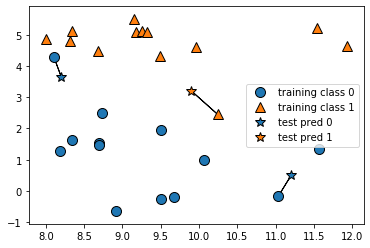

In [89]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

Abbildung 2-4. Vorhersagen des One-Nearest-Neighbor Modells auf dem Forge-Datensatz

In der Abbildung wurden drei neue Datenpunkte hinzugefügt, die als Sterne dargestellt werden. Für jeden neuen Datenpunkt wurde der nächste Punkt im Trainingsset markiert. Die Vorhersage des One-Neighbor-Algorithmus ist die Bezeichnung dieses Punktes (dargestellt durch die Farbe des Kreuzes).

Anstatt nur den nächstgelegenen Nachbarn zu berücksichtigen, kann auch eine beliebige Anzahl, k, parametriert werden.   Wenn mehr als ein Nachbar in Betracht gezogen wird, wird das vorhergesagte Label gevotet. Es wird für jeden Testpunkt ermittelt, wie viele Nachbarn mit bestimtmer Klassenzugehörigkeit in der parametrierten Nachbarschaft vorhanden sind.
In der nachfolgenden Abbildung 2-5 wird die Anzahl der nächsten Nachbarn mit k = 3 parametriert.

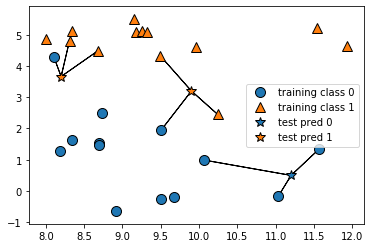

In [92]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

Abbildung 2-5. Vorhersagen des Three-Nearest-Neighbors Modells auf dem Forge-Datensatz

Die Vorhersage des 3-NN Klassifikators für den neuen Datenpunkt oben links in der Abbildung ist nun nicht mehr die selbe wie beim 1-NN Klassifikator. Während es sich bei dieser Darstellung um ein binäres Klassifikationsproblem handelt, kann diese Methode auf Datensätze mit beliebig vielen Klassen angewendet werden. Die Voting-Strategie der Multi-Klassen k-NN Klassifikation funktioniert analog zur Binärklassifikation.

Im weiteren soll die k-NN Klassifikation mit Scikit-Learn durchgeführt werden.
Dazu werden die Daten zunächst in einen Training- bzw. Testdatensatz aufgeteilt. Anschließend soll die Generalisierungsleistung bewerten werden.

In [85]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Als nächstes wird die Klasse importiert und instanziiert. Hierbei können auch die Parameter einstellen werden, wie z.B. die Anzahl der zu verwendenden Nachbarn k.

In [37]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

Nun wird der Klassifikator mit dem Trainingsset trainiert. Der KNeighborsClassifier speichert hierzu den Datensatz, so dass die Anzahl nächster Nachbarn bei der Vorhersage berechnet werden können:

In [38]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

Um Vorhersagen über die Testdaten zu treffen, wird die Vorhersagemethode definiert. Für jeden Datenpunkt im Testsatz berechnet dieser seine nächsten Nachbarn im Trainingssatz und ermittelt die häufigste Klasse unter diesen: 

In [39]:
print("Test set predictions: {}".format(clf.predict(X_test)))

Test set predictions: [1 0 1 0 1 0 0]


Um zu beurteilen, wie gut das Modell generalisiert, kann die Score-Methode mit den Testdaten ubd den Testlabels aufgerufen werden:


In [40]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.86


Das Modell erzeilt eine Genauigkeit von 86%. Das bedeutet, dass das Modell die Klasse für 86% der Datenpunkte des Testdatensatzes korrekt vorhergesagt hat.


Analyse des KNeighborsClassifiers 

Für zweidimensionale Datensätze kann die Vorhersage für alle möglichen Testpunkte in der xy-Ebene dargestellt werden.

Die Ebene wird in Anlehnung an die Klasse eingefärbt, die einem Punkt in dieser Region zugeordnet wird. Dies ermöglicht es, die Entscheidungsgrenze zu betrachten. Die Entscheidungsgrenze beschreibt die Kluft zwischen der Zuordnung zu Klasse 0 bzw. zu Klasse 1 durch den Algorithmus.  Der folgende Code erzeugt die Visualisierungen der Entscheidungsgrenzen für einen, drei und neun Nachbarn, wie in Abbildung 2-6 dargestellt:

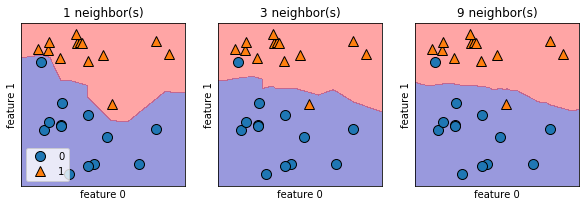

In [41]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
    axes[0].legend(loc=3)

Abbildung  2-6. Entscheidungsgrenzen, die durch das k-NN Modell für Werte von k={1,3,9} erstellt wurden

Wie links in der Abbildung 2-6 dargestellt, führt die Verwendung eines einzelnen Nachbarn zu einer Entscheidungsgrenze, die den Trainingsdaten genau folgt. Die Berücksichtigung von mehr Nachbarn führt zu einer glatteren Entscheidungsgrenze. Eine glattere Grenze entspricht einem einfacheren Modell. Mit anderen Worten, die Verwendung weniger Nachbarn entspricht einer hohen Modellkomplexität, und die Verwendung vieler Nachbarn entspricht einer geringen Modellkomplexität. Betrachtet man den Extremfall, dass die Anzahl der Nachbarn die Anzahl aller Datenpunkte im Trainingsset ist, so hätte jeder Testpunkt genau die gleichen Nachbarn (alle Trainingspunkte) und alle Vorhersagen wären die gleichen: Die Klasse, die im Trainingsset am häufigsten ist.

Im Weiteren soll der Zusammenhang zwischen Modellkomplexität und Generalisierungsleistung untersucht werden.
Dies wird auf der Grundlage des realen open-source Datensatzes breast-cancer durchgeführt. Erneut wird der Datensatz in ein Training und ein Testset aufgeteilt. Danach wird das Training ausgewertet und die Leistung des Sets mit einer unterschiedlichen Anzahl von Nachbarn getestet. Die Ergebnisse sind in Abbildung 2-7 dargestellt:

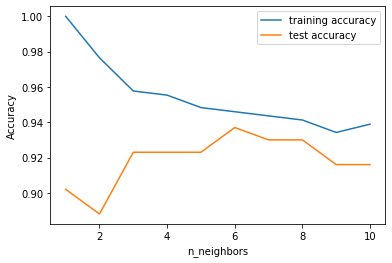

In [42]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

Die Darstellung zeigt die Genauigkeit des Trainings- und Testsatzes auf der y-Achse im Anzahl der Nachbarnk auf der x-Achse. 

In der Abbildung können einige der Merkmale von Over- und Underfitting erkannt werden.Es ist zu beachten , dass die Berücksichtigung von weniger Nachbarn einem komplexeren Modell entspricht. Unter Einsatz eines 1-NN Klassifikators  ist die Vorhersage auf dem Trainingsset perfekt. Werden allerdings mehr Nachbarn berücksichtigt, wird das Modell einfacher und die Trainingsgenauigkeit sinkt. Die Genauigkeit des Testsets für die Verwendung eines einzelnen Nachbarn ist geringer als bei der Verwendung mehrerer Nachbarn. Dies deutet darauf hin, dass die Verwendung des einzelnen nächsten Nachbarn zu einem zu komplexen Modell führt. Werden allerdings 10 Nachbarn betrachtet, ist das Modell zu einfach und die Modelleistung sinkt. Die beste Modellleistung befindet sich mit etwa sechs Nachbarn in der Mitte. 

**k-Neighbors Regression** 

Nun wird die Regressionsvariante des k-Nearest-Neighbors Algorithmus vorgestellt. Auch hier wird zunächst mit der 1-NN Variante begonnen und der wave-Datensatz eingesetzt. Außerdem werden in der Abbildung drei Testdatenpunkte eingeführt (grüne Sterne auf der x-Achse) hinzugefügt. Die Vorhersage mit einem einzelnen Nachbarn wird durch Zielwert des nächsten Nachbarn. Diese sind in Abbildung 2-8 als blaue Sterne dargestellt:


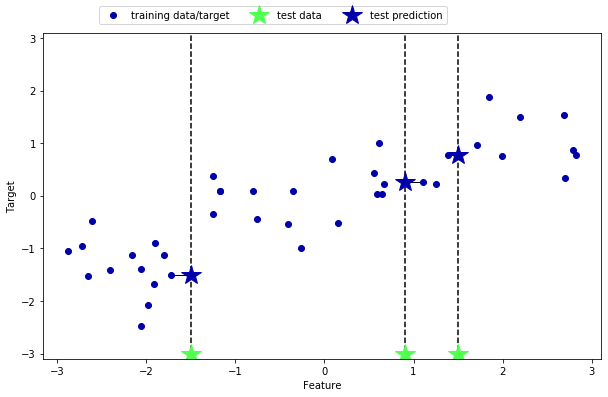

In [43]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

Abbildung 2-8. Vorhersagen der One-Neighbor-Regression auf dem wave-Datensatz   

Auch hier können mehrerer nächste Nachbarn für die Regression verwenden werden. Bei der Verwendung
mehrere nächster Nachbarn entspricht die Vorhersage dem Mittelwert der relevanten Nachbarn (vgl. Abbildung 2-9):

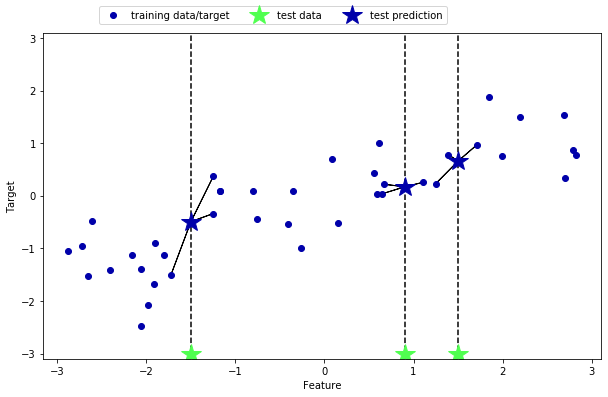

In [44]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

Abbildung 2-9. Vorhersagen der Regression von drei Nachbarn auf dem Wellendatensatz

Der k-NN Algorithmus für die Regression ist in der KNeighbors Regressor Klasse in scikit-learn implementiert. Dieser wird ähnlich wie der KNeighborsClassifier verwendet:

In [95]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)

# fit the model using the training data and training targets
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

Nun können Vorhersagen am Testdatensatz durchgeführt werden.

In [96]:
print("Test set predictions:\n{}".format(reg.predict(X_test)))

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


Das Modell kann außerdem mit der Score-Methode bewertet werden, die für Regressoren den sogennanten R²-Score zurück gibt. Der R²-Score, auch bekannt als der Determinationskoeffizient, ist ein Maß für die Güte einer Vorhersage für ein Regressionsmodell und ergibt einen Wert zwischen 0 und 1. EEin Wert von 1 entspricht einer perfekten Vorhersage, und ein Wert von 0 entspricht einem konstanten Modell, das nur den Mittelwert der Trainingsdatenantworten voraussagt, y_train:

In [47]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.83


Hier liegt die R²-Wert bei 0,83 was auf eine relativ gute Modellgüte hinweist.

Analysieren des KNeighborsRegressors

Für einen eindimensionalen Datensatz ist ersichtlich, wie die Prognosen für verschiedene Merkmalswerte aussehen (Abbildung 2-10). Dazu wird ein Testdatensatz erstellt, der aus vielen Punkten auf einer Linie besteht:

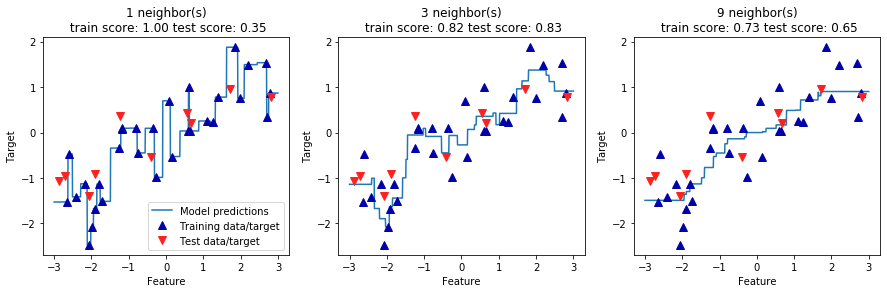

In [48]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
"Test data/target"], loc="best")

Abbildung 2-10. Vergleich von Vorhersagen der Regression des k-NN Algorithmus für verschiedene k-Werte

Wie wir aus dem Diagramm ersehen können, hat jeder Punkt im Trainingssatz mit nur einem einzigen Nachbarn einen offensichtlichen Einfluss auf die Vorhersagen, und die vorhergesagten Werte durchlaufen alle Datenpunkte. Dies führt zu einer sehr instabilen Vorhersage. Die Berücksichtigung von mehr Nachbarn führt zu glatteren Vorhersagen, aber diese passen nicht auch zu den Trainingsdaten.

**Stärken, Schwächen und Parameter**
 
Grundsätzlich gibt es zwei wichtige Parameter für den KNeighbors Klassifikator: die Anzahl der Nachbarn k und die Wahl des ABstandmaßes zwischen den Punkten. In der Praxis funktioniert die Verwendung einer kleinen Anzahl von Nachbarn wie drei oder fünf häufig gut, jedoch ist es stets ratsam die Parameter zu variieren. 
Die Wahl des optimalen Abstandsmaßes ist nicht trivial. Standardmäßig wird die euklidische Distanz verwendet, was meist gut funktioniert. 

Eine der Stärken von k-NN ist, dass das Modell sehr einfach zu verstehen ist und oft eine vernünftige Leistung ohne viele Anpassungen erzielt wird. 
Die Verwendung dieses Algorithmus ist eine gute Methode um einen Datensatz zu bearbeiten, bevor fortgeschrittenere Techniken in Betracht gezogen werden. 

Die Bildung eines k-NN Modells ist grundsätzlich nicht rechenintensiv. Wird jedoch das Trainingsset groß ist, kann die Vorhersagedauer hoch sein. Bei der Verwendung des k-NN-Algorithmus ist es wichtig, dass die Daten vorverarbeitet werden. Dieser Ansatz funktioniert oft unzureichend bei Datensätzen mit vielen Features (Hunderte oder mehr) und bei Datensaätzen bei denen die meisten Feature-Werte nahe 0 sind (sogenannte spärliche Datensätze). Obwohl der Algorithmus der k-NN Algorithmus leicht zu verstehen ist, wird er in der Praxis nicht oft verwendet. Dies hat den Grund, dass die Vorhersage zeitaufwändig ist und der Algorithmusnicht in der Lage ist große Zahl an verschiedenen Features zu handhaben. Der Algorihmus, der im nächsten Schritt thematisiert wird hat keinen dieser Nachteile

#### 2.4.2. Lineare Modelle <a name="linear"></a> 

Lineare Modelle sind eine Klasse von Modellen, die in der Praxis weit verbreitet sind und in den letzten Jahrzehnten intensiv untersucht wurden. Lineare Modelle tätigen eine Vorhersage mit einer linearen Funktion der Eingangsmerkmale.

**Lineare Modelle für die Regression**

Für die Regression sieht die allgemeine Praediktionsgleichung für ein lineares Modell wie folgt aus:

ŷ = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b

Hier bezeichnen x[0] bis x[p] die Merkmale (Anzahl der Merkmale: p) eines einzelnen Datenpunktes, w und b sind Parameter des erlernten Modells, und ŷ ist die Vorhersage des Modells. Für einen Datensatz mit einem einzelnen Merkmal ergibt sich der folgende Zusammenhang:

ŷ = w[0] * x[0] + b

Dies entspricht einer klassischen Geradengleichung. Hierbei ist w[0] die Steigung und b der y-Achsenabschnitt. Für weitere Merkmale enthält w die Steigungen der jeweiligen Merkmalsachse. Die Vorhersage des Modells kann auch als die gewichtete Summe der Eingabemerkmale vetrachtet werden, wobei die Gewichte (die negativ sein können) durch die Eingaben von w gegeben sind.

Nun werden die Parameter w[0] und b auf dem bereits bekannten eindimensionalen wave-Datensatz trainiert. Dies kann durch den folgenden Befhel geschehen (vgl. Abbildung 2-11):

w[0]: 0.393906  b: -0.031804


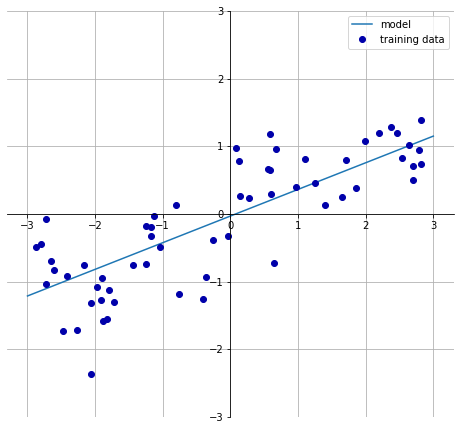

In [103]:
mglearn.plots.plot_linear_regression_wave()

Abbildung 2-11. Vorhersage eines linearen Modells auf dem Wave-Datensatz

In der Abbildung 2-11 beträgt die Steigung w[0] 0,4. Der y-Achsenabschnitt liegt mit -0,032 knapp unter dem Nullpunkt des Koordinatensystems.
Lineare Modelle für die Regression können als Regressionsmodelle charakterisiert werden, bei denen die Vorhersage eine Linie für ein einzelnes Merkmal, eine Ebene bei Verwendung von zwei Merkmalen oder eine Hyperebene in höheren Dimensionen (d.h. bei Verwendung von mehr Merkmalen) ist.

Es gibt verschiedene lineare Modelle für die Regression. Der Unterschied zwischen diesen
Modelle liegt in der Art und Weise wie die Modellparameter w und b aus den Trainingsdaten gebildet werden,
und wie die Modellkomplexität kontrolliert werden kann. Im weiteren werden einige
beliebte lineare Modelle für die Regression vorgestellt.

**Lineare Regression**

Die lineare Regression (auch bekannt als gewöhnliche kleinste Quadrate (GLS) ist die einfachste lineare Methode der Regression. Die lineare Regression findet die Parameter w und b, die den mittleren quadratischen Fehler zwischen Vorhersagen und den wahren Regressionszielen y auf dem Trainingssatz minimieren. Der mittlere quadrierte Fehler ist die Summe der quadrierten Differenzen zwischen den Vorhersagen und den wahren Werten. Die lineare Regression hat keine Parameter. Folglich besteht keine Möglichkeit, die Komplexität des Modells zu kontrollieren. Unten folgt der Code, der das Modell erzeugt. Die Abbildung 2-11 enthält den entsprechenden Plot.

In [104]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

Der Steigungs-Parameter (w), auch Gewichte oder Koeffizienten, werden im Attribut coef_ gespeichert, während der Offset oder Intercept (b) im Attribut intercept_ gespeichert wird:

In [105]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


Das intercept_-Attribut ist stets ein Skalar, wobei das coef_-Attribut ein NumPy-Array mit einem Eintrag pro Eingabefunktion ist. Da im wave-Datensatz nur ein Eingabefeature existiert, hat lr.coef_ nur einen Eintrag. Weiter werden die Modellgüte (R²-Score) am Trainigs- und Testset bestimmt:

In [106]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


Der ermittelte R² von etwa 0,66 ist nicht besonders gut. Die Ergebnisse auf den Trainings- und Testsätzen liegen jedoch sehr eng beieinander liegen. Dies deutet auf ein Underfittung des Modellshin. Für diesen eindimensionalen Datensatz besteht kaum die Gefahr von Overfitting, da das Modell sehr einfach (oder eingeschränkt) ist. Bei höherdimensionalen Datensätzen (d.h. Datensätzen mit einer großen Anzahl von Features) werden lineare Modelle leistungsfähiger, und es besteht die Gefahr von Overfitting. Im Weiteren soll das Verhalten von linearen Regressoren bei höherdimensionalen Datensätzen, wie das Boston-Housing Datenset, untersucht werden. Der Datensatz enthält 506 Samples und 105 abgeleitete Features.  

Zunächst wird hierzu der Datensatz geladen und ein Training und ein Testset aufgeteilt. Danach wird das lineare Regressionsmodell trainiert:

In [140]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

Beim Vergleich des R²-Scores des Regressionsmodells auf dem Trainings- und Testset-set ist erkennbar, dass die Vorhersage dem Trainings-Set hervorragend ist. Der R²-Wert auf dem Testset ist mit 0,61 deutlich schlechter:

In [141]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


Diese Diskrepanz zwischen der Modellleistung auf dem Trainingsset bzw. Testset ist ein deutliches Zeichen für Overfitting. Um dies zu vermeiden, sollte ein Modell angewandt werden, welches in der Lage ist Modellkomplexität zu kontrollieren. Eine der am häufigsten verwendeten Alternativen zur herkömmlichen linearen Regression ist die Ridge-Regression, die wir im Folgenden untersuchen werden. 

**Ridge Regression**

Die Ridge-Regression ist ebenfalls ein lineares Modell für die Regression. Es gilt folglichder selbe mathematische Zusammenhang wie für gewöhnliche kleinsten Quadrate (GLS).

Bei der Ridge-Regression werden die Koeffizienten (w) trainiert um die folgenden beiden Kriterien zu erfüllen:

- Eine gute Vorhersageleistung auf dem Trainingsset
- Der skalare Werte der Koeffizienten (w) soll möglichst nahe Null sein

Dieses Vorgehen nennt man Regularisierung. Intuitiv bedeutet dies, dass jedes Merkmal so wenig Einfluss wie möglich auf das Ergebnis haben sollte, während es dennoch eine gute Vorhersage macht. 
Bei der Regularisierung wird ein Modell explizit eingeschränkt, um Overfitting zu vermeiden. 
Ridge-Regression ist auch als L2-Regularisierung bekannt. Die Ridge-Regression ist in linear_model.Ridge implementiert. Nachfolgend wird die Redge-Regresseion auf das Boston-Housing Datenset angewendet.

In [142]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score (Ridge): {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score(Ridge): {:.2f}".format(ridge.score(X_test, y_test)))

Training set score (Ridge): 0.89
Test set score(Ridge): 0.75


Der R²-Score auf dem Trainingsset von Ridge ist mit 0,75 niedriger als bei LinearRegression. Wohingegen der R²-Score bei dem Testset höher ist. Die verbesserte Generalisierungsleistung auf die unbekannten Daten des Testsets wird durch die Einschränkung des Modells erzielt. Ein weniger komplexes Modell bedeutet eine schlechtere Moidellleistung auf dem Trainingsset, resultiert jedoch in einer besseren Generalisierungsleistung. Da die Generalisierungsleistung eines Modell ein´sehr wichtiges Kriterium darstellt, sollten regularisierende Modelle bevorzugt werden.

Das Ridge-Modell beschreibt einen Kompromiss zwischen der Einfachheit des Modells (nahezu Nullkoeffizienten) und der Leistung auf dem Trainingsset. Die Gewichtung auf die Einfachheit des Modells im Vergleich zur Leistung auf dem Trainingssets kann durch den Parameter alpha festgelegt werden.

Im vorherigen Beispiel haben wurde der Standardparameter alpha=1.0 verwendet. Die Einstellung des Parameters alpha muss unter Berücksichtigung des Datensatzes geschehen. Die Erhöhung des Alpha-Koeffizienten, resultiert in kleineren Koeefizienten (näher Null - einfacheres Modell). Dies verringert zwar die Leistung des Regressors auf dem Trainingsset verringert, erhöht jedoch die Generalisierungsleistung. 

In [143]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


Durch die Verringerung von alpha werden die Koeffizienten weniger eingeschränkt. Geht alpha gegen Null sind die Koeffizienten kaum eingeschränkt, und das Ergebnis ähnelt der Linear-Regression:

In [144]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


Es wird einer gute generalisierungsleistung für alpha=0.1 erzielt.

Wir können auch einen qualitativeren Einblick erhalten, wie der Alpha-Parameter das Modell verändert, indem wir das coef_-Attribut von Modellen mit unterschiedlichen Alpha-Werten untersuchen. Ein höherer Alpha-Wert bedeutet ein eingeschränkteres Modell, daher erwarten wir, dass die Einträge von coef_ bei einem hohen Alpha-Wert eine kleinere Größe haben als bei einem niedrigen Alpha-Wert. Dies wird im Diagramm in Abbildung 2-12 bestätigt:

in der Abbildung 2-12 wird die qualitateive Auswirkung des alpha-Parameters untersucht.

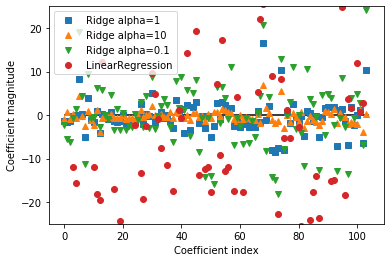

In [145]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

Abbildung 2-12. Vergleich von Koeffizientengrößen für die Ridge-Regression mit verschiedenen Werten der Alpha- und linearen Regression

In der Abbildung 2-12 beschreibt die x-Achse die Einträge von coef_: x=0 zeigt den dem ersten Merkmal zugeordneten Koeffizienten, x=1 den dem zweiten Merkmal zugeordneten Koeffizienten usw. Die y-Achse beschreibt die Werte der Koeffizienten. 

Die Abbildun 2-12 zeigt, dass für alpha=10 die Koeffizienten meist zwischen etwa -3 und 3 liegen. Die Koeffizienten für das Ridge-Modell mit alpha=1 sind etwas größer. Die Punkte, die Alpha=0,1 zugeordnet werden können,sind noch größer. Viele der Punkte, die einer linearen Regression ohne Regularisierung entsprechen (was Alpha=0 wäre), haben eine Größenordnung, die außerhalb des Plots liegen.

**Lasso Regression**

Eine Alternative zu Ridge zur Regularisierung der linearen Regression ist Lasso. Wie bei der Ridge-Regression beschränkt auch die Verwendung von Lasso die Koeffizienten auf nahezu Null. Lasso wird auch als L1-Regulierung bezeichnet. 

Bei der Verwendung der Lasso-Regulierung, kommt es vor, dass einige Koeffizienten genau Null sind. Somit werden einige Features vom Modell vollständig ignoriert. Dies kann als eine Form der automatischen Merkmalsauswahl angesehen werden. Wenn einige Koeffizienten genau Null sind, ist ein Modell oft leichter zu interpretieren und kann die wichtigsten Merkmale Ihres Modells offenbaren. Nachfolgend wird Lasso auf den erweiterten Boston-Housing-Datensatz angewandt:

In [146]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("Training set score (Lasso): {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score (Lasso): {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score (Lasso): 0.29
Test set score (Lasso): 0.21
Number of features used: 4


Die Modelleistung der Lasso-Regression ist mit R²-Scores von 0,29 und 0,21 auf dem Traings- bzw. Testset schlecht.
Dies deutet auf ein Underfitting hin. Es wurden außerdem lediglich 4 der 105 Features einbezogen. Ähnlich wie Ridge hat das Lasso auch einen Regularisierungsparameter alpha. Alpha steuert, wie sehr Koeffizienten gegen Null gehen.
Auch in diesem Beispiel kann alpha verringert werden um Underfitting zu vermeiden. Dazu muss jedoch auch die Standardeinstellung von max_iter (die maximale Anzahl der auszuführenden Iterationen) erhöht werden: 

In [147]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


Ein geringerer Wert für Alpha erlaubte es, ein komplexeres Modell anzuwenden. Das komplexere Modell erzeilt einer bessere Modellleistung auf dem Trainings- und Testset. Die Modelleistung ist geringfügig besser als mit Ridge. Außerdem werden lediglich 33 der 105 Features benötigt. Dies macht dieses Modell potenziell leichter verständlich.  Bei einer zu kleinen Definition von alpha, findet keine Regularisierung statt und Overfitting tritt auf(mit einem Ergebnissen ähnlich der Linear-Regression):

In [116]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


Auch hier können die Koeffizienten der verschiedenen Modelle visualisiert werden. Das Ergebnis ist in Abbildung 2-14 dargestellt:

Text(0, 0.5, 'Coefficient magnitude')

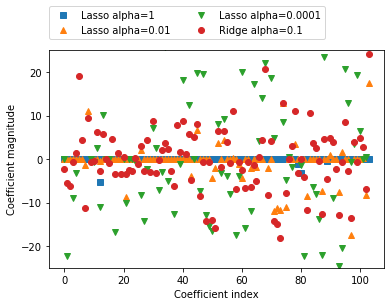

In [148]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

Abbildung 2-14. Vergleich von Koeffizientengrößen für die Lasso-Regression mit verschiedenen Werten der Alpha- und Ridge-Regression

Für alpha=1 ist ein Großteil Koeffizienten nahezu Null. Wird alpha auf 0,01 reduziert, erhalten wir die Lösung, die als grüne Punkte dargestellt wird, was dazu führt, dass die meisten Funktionen genau Null sind. 
Mit alpha=0.00001 ergibt sich ein unregularisiertes Modell, bei dem die meisten Koeffizienten groß und ungleich Null sind. Zum Vergleich: Die beste Lösung für das Ridge-Modell wird mit alpha=0,1 erzielt. Dieses hat eine vergleichbare Prädiktionsleistungwie das Lasso-Modell mit alpha=0,01. Bei Ridge sind jedoch alle Koeefizienten ungleich Null. In der Praxis ist die Ridge-Regression in der Regel die erste Wahl zwischen den beiden Regularisierungs-Modellen. 
Bei einer hohen Feature-Zahl, oder wenn ein leicht zu interpretierendes Modell gewünscht ist, kann Lasso jedoch die bessere Wahl sein. Scikit-learn bietet mit der ElasticNet-Klasse, eine hybride variante von Lasso und Ridge. In der Praxis funktioniert diese Kombination am besten, allerdings müssen hierbei zwei Parameter eingestellt werden (jeweils ein Parameter für  die L1-Regulierung bzw. L2-Regulierung).

**Lineare Modelle zur Klassifikation**

Lineare Modelle werden auch häufig zur Klassifikation verwendet. Zunächst wird die binäre Klassifikation betrachtet. In diesem Fall wird eine Vorhersage mit der folgenden Formel durchgeführt:

ŷ = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b > 0

Die Formel weist Ähnlichkeiten zur linearen Regressionsformelauf, enthält jedoch einen Grenzwert (>0). Wenn die Funktion ŷ ein Ergebnis kleiner als Null ergibt, prognostizieren der Klassifikator die Klasse -1. Ist das Ergebnis größer Null wird die Klasse +1 prädiziert. Dies ist das grundlegende Vorgehen für alle linearen Modelle zur Klassifikation. Auch hier gibt es viele verschiedene Möglichkeiten, die Koeffizienten (w) und den Achsabschnitt (b) zu berechnen.

Bei linearen Modellen für die Regression ist die Ausgabe ŷ eine lineare Funktion der Features: Eine Linie, Ebene oder Hyperebene (in höheren Dimensionen). Bei linearen Modellen zur Klassifikation ist die Entscheidungsgrenze eine lineare Funktion des Eingangs. Ein (binärer) linearer Klassifikator ist ein Klassifikator, der zwei Klassen durch eine Linie, eine Ebene oder eine Hyperebene trennt.

Es existieren viele Algorithmen zum Erlernen linearer Modelle. Diese Algorithmen unterscheiden sich alle in den folgenden zwei Punkten:  

- Die Berechnung der Modellgüte (Loss-function, Verlustfunktion)

- Ob und welche Art von Regularisierung verwendet wird 

Aus mathematischen Gründen ist es nicht möglich, w und b so zu wählen, dass die Anzahl der Fehlklassifikationen minimiert wird. Die beiden gebräuchlichsten linearen Klassifikationsalgorithmen sind die logistische Regression (implementiert in linear_model.LogisticRegression) und lineare Support-Vector-Machines (lineare SVMs) (implementiert in svm.LinearSVC) Dabei steht SVC für Support-Vector-Classifier. Trotz ihres Namens ist LogisticRegression ein Klassifikationsalgorithmus und kein Regressionsalgorithmus und sollte nicht mit LinearRegression verwechselt werden. 

Wir können die Modelle LogisticRegression und LinearSVC auf den Forge-Datensatz anwenden und die Entscheidungsgrenze visualisieren, wie sie von den linearen Modellen gefunden wird (Abbildung 2-15):

/home/ralfi/.local/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/ralfi/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


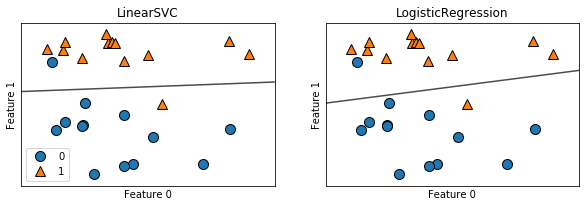

In [118]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

Abbildung 2-15. Entscheidungsgrenzen einer linearen SVM und logistische Regression auf den Forge-Datensatz mit den Standard-Parametern

In obiger Abbildung wird das erste Feature des Forge-Datensatzes auf der x-Achse und das zweite Feature auf der y-Achse dargestellt. Die jeweils von LinearSVC bzw. LogisticRegression identifizierten Entscheidungsgrenzen sind als Linien in dem Plot dargestellt. Die Entscheidungsgrenzen trennen den Bereich der Klasse 1 von dem Bereich der Klasse 0. 

In anderen Worten: Jeder neue Datenpunkt, der oberhalb der schwarzen Linie liegt, wird vom jeweiligen Klassifizierer in die Klasse 1 eingestuft. Während Punkte, die unterhalb der schwarzen Linie liegen, der Klasse 0zugeordnet werden. Die beiden Modelle haben ähnliche Entscheidungsgrenzen.Auffällig ist, dass beide Modelle zwei der Punkte falsch klassifiziert haben. Standardmäßig wenden beide Modelle eine L2-Regularisierung an. Zur Steuerung der Regularisierung bei der Logistic-Regression und Linear-SVC existiert der Trade-off-Parameter C. Für große Werte für C geht eine starke Regularisierung einher (und Umgekehrt).

Die Verwendung niedriger C-Werte führt dazu, das die Klassifikatoren sich nach dem Großteil der Datenpunkte bilden.
Wobei die Verwendung eines großen C-Wertes mit der korrekten Klassifikation jedes einzelnen Datenpunkts einhergeht. Der Zusammenhang ist für eine Linear-SVC in Abbildung 2-16 dargestellt:

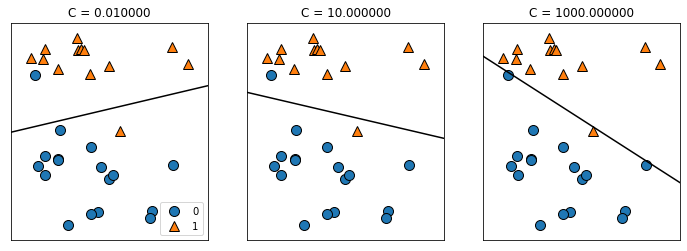

In [149]:
mglearn.plots.plot_linear_svc_regularization()

Abbildung 2-16. Entscheidungsgrenzen eines linearen SVM auf dem Forge-Datensatz für verschiedene Werte von C

Im linken Plot (C=0,01) ergibt sich eine starke Regularisierung. Das stark regulierte Modell wählt eine relativ horizontale Linie und klassifiziert zwei Punkte falsch. 
Im mittleren Plot ist C etwas höher, was einer geringeren Regularisierung entspricht. Die Entscheidungsgrenze ist auf Grund der beiden falsch klassifizierten Punkte stärker geneigt.

Im rechten Plot (C=1000) ist die Entscheidungsgrenze deutlich stärker geneigt. Das Modell klassifiziert nun alle Punkte in der Klasse 0 korrekt. Ein Punkt der Klasse 1 wird noch immer falsch klassifiziert. Es sei darauf hingewiesen, dass für das vorliegende Datenset keine fehlerfreie lineare Klassifikation möglich ist. Das Modell für C=1000 weist Overfitting auf.  

Ähnlich wie bei der Regression können lineare Modelle zur Klassifikation in niedrigdimensionalen Räumen sehr restriktiv erscheinen und nur geradlinige Entscheidungsgrenzen oder in der Form von Ebenen berücksichtigen. 

In höheren Dimensionen werden lineare Modelle zur Klassifikation sehr leistungsfähig. Dabei bekommt die Vermediung von Overfitting eine hohe Bedeutung. Im weiteren wird LinearLogistic im Detail anhand des Breast-Cancer-Datensatzes  analysiert:

In [150]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.953
Test set score: 0.958


/home/ralfi/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Der Standardwert C=1 bietet erzielt eine gut Modellleistung mit einer Genauigkeit von 95% sowohl beim Training als auch beim Testset. Da die Leistung von Trainings- und Testsets jedoch sehr nahe beieinander liegt, ist es wahrscheinlich, dass underfitting vorliegt. Weiter soll C erhöht werden, um einem besser generalisierendes Modell zu erhalten:

In [151]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.967
Test set score: 0.965


/home/ralfi/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Im weiteren können in der Abbildung 2-17 die Koeffizienten der Modelle für drei verschiedene Parameter C entnommen werdendung 2-17):

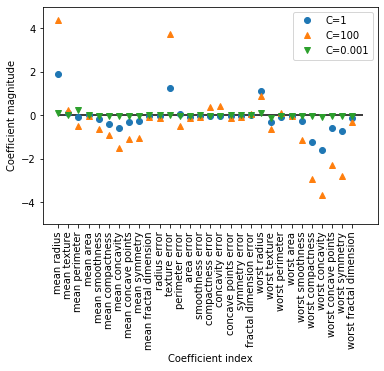

In [154]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()

Abbildung 2-17. Koeffizienten, die durch logistische Regression auf dem Breast-Cancer Datensatz für verschiedene Werte von C gelernt wurden

Stärken, Schwächen und Parameter 

Der wichtigste Parameter von linearen Modellen ist der Regularisierungsparameter:

- Bei Regressionsmodellen: Alpha
- Bei LinearSVC und LogisticRegression: 

Große Werte für Alpha oder kleine Werte für C bedeuten einfache Modelle. Insbesondere für die Regressionsmodelle ist die Einstellung dieser Parameter sehr wichtig. 

Normalerweise werden C und alpha auf einer logarithmischen Skala ermittelt. 
Weiter muss eine Art der Regularisierungsart (L1 oder L2) gewähöt werden.
L1 sollte verwendet werden, wenn nur wenige der Features tatsächlich relevant sind oder die Interpretierbarkeit des Modells wichtig ist. Andernfalls sollte L2 verwendent werden.

Lineare Modelle sind berechnungseffizient in Bezug auf das Training und die Prädiktion. Sie skalieren auf sehr große Datensätze und arbeiten gut mit spärlichen Daten. Nachteilig ist jedoch, dass die Nachvollziehbarkeit von Koeffizienten oft nicht möglich ist. Dies gilt insbesondere, wenn der Datensatz korrelierte Features aufweist. In diesen Fällen können die Koeffizienten schwer interpretierbar sein.


#### 2.4.2. Decision Trees <a name="decision"></a> 

Entscheidungsbäume (Decision Trees) sind weit verbreitete Modelle für Klassifikations- und Regressionsaufgaben. Im Wesentlichen lernen sie eine Hierarchie von Bedingungen (if/else Abfragen), die zu einer finalen Entscheidung führt.  

**Decision Trees zur Klassifikation**

Besipiel-Szenario: Es soll zwischen den folgenden vier Tier-Arten entschieden werden: Bären, Falken, Pinguine und Delfine. Das Ziel ist es, die richtige Antwort zu finden, indem Sie so wenig Bedingungen (if/else Abragen) wie möglich angewendet werden. Eine mögliche erste Bedingung sei nun die Frage nach der Eigenschaft obdas Tier Federn hat. Diese Bedingung reduziert die Menge der möglichen Tiere auf zwei (Falken und Pinguine). Nachfolgend zur ersten Bedingung sollen nun weitere Bedingungen folgen. Jeweils eine für den Pfad der die erfüllte und die nicht erfüllte Bedingung "Hat Federn". Um weiter zwischen Pinguinen und Falken unterscheiden kann die Bedingung "Kann fliegen" angewendet werden. Hat ein Tier keine Federn, kann nachfolgend die Bedingung "Hat flossen" abgefragt werden. Diese Reihe von Bedingungen kann als Entscheidungsbaum formuliert werden, wie in Abbildung 2-22 dargestellt.

<p align="center">
  <img src="img/tree1.png" width = "50%">
</p>

Abbildung 2-22. Ein Entscheidungsbaum zur Unterscheidung mehrerer Tiere

Im Weiteren soll der Aufbau von Entscheidungsbaum des in der Abbildung 2-23 dargestellten 2D-Klassifikationsdatensatz betrachtet werden. Der Datensatz heißt Two-Moons Datensatz und entält Daten über Halbmondformen. Wobei jede Klasse aus 75 Datenpunkten besteht. Einen Entscheidungsbaum zu bilden bedeutet, diejenige Reihenfolge der if/else- Bedingungen zu lernen, die mit der geringsten Anzahl an Bedingungen alle Daten klassifizieren kann. Solche Bedingungen werden häufig auch als Tests bezeichnet. In der Praxis sind Tests häufig auch relationale Bedingung bei denen kontinuierliche Werte verglichen werden (vgl. Abbildung 2-14).

<p align="center">
  <img src="img/halfmoon.png" width = "50%">
</p>

Abbildung 2-23. Zwei-Monde-Datensatz, auf dem der Entscheidungsbaum aufgebaut wird.

Um einen Baum zu erstellen, evaluiert der Algorithmus alle möglichen Tests und findet denjenigen, der die größte Aussagekraft über die Zielvariable hat. Die Abbildung 2-24 zeigt den ersten Test. Die vertikale Aufteilung des Datensatzes bei x[1]=0,0596 resultiert in dem höchsten Informationsgewinn; sie trennt am optimal die Punkte in Klasse 1 von den Punkten in Klasse 2. Der oberste Knoten des Entscheidungsbaums, auch Wurzel genannt, repräsentiert den gesamten Datensatz. Dieser besteht aus 75 Punkten der Klasse 0 und 75 Punkten der Klasse 1. Die Aufteilung erfolgt durch Prüfung, ob x[1] <= 0,0596, dargestellt durch eine schwarze Linie im Diagramm. Wenn der Test wahr ist, wird dem linken Knoten ein Punkt zugewiesen, der 2 Punkte der Klasse 0 und 32 Punkte der Klasse 1 enthält. Andernfalls wird der Punkt dem rechten Knoten zugeordnet, der 48 Punkte der Klasse 0 und 18 Punkte der Klasse 1 enthält. Diese beiden Knoten entsprechen den in Abbildung 2-24 dargestellten oberen und unteren Bereichen. Obwohl die erste Aufteilung die Trennung der beiden Klassen gut gemacht hat, enthält der untere Bereich noch Punkte der Klasse 0 und der obere Bereich noch Punkte der Klasse 1. 
Ein genaueres Modell kann erstellt werden, indem der Suchprozess des optimalen Tests in beiden Sub-Regionen wiederholt wird. Die Abbildung 2-25 zeigt, dass die aussagekräftigste nächste Aufteilung für den linken und rechten Bereich auf x[0] basiert.

<p align="center">
  <img src="img/halfmoon1.png" width = "90%">
</p>

Abbildung 2-24. Entscheidungsgrenze des Baumes mit Tiefe 1 (links) und entsprechendem Baum (rechts)

<p align="center">
  <img src="img/halfmoon2.png" width = "90%">
</p>

Abbildung 2-25. Entscheidungsgrenze des Baumes mit Tiefe 2 (links) und entsprechende Entscheidung
Baum (rechts)

Dieser rekursive Prozess liefert einen binären Entscheidungsbaum, wobei jeder Knoten einen Test enthält. Ein Test kann alternativ auch als eine Teilung der aktuell betrachteten Daten. Dies ergibt eine Ansicht des Algorithmus als Aufbau einer hierarchischen Partition. Da jeder Test nur ein einzelnes Feature betrifft, weisen die Bereiche in der resultierenden Partition immer achsparallele Grenzen auf. Die rekursive Partitionierung der Daten wird so lange wiederholt, bis jeder Bereich in der Partition (jedes Blatt im Entscheidungsbaum) nur noch einen einzigen Zielwert (eine einzelne Klasse oder ein einzelner Regressionswert) enthält. Ein Blatt des Baumes, das nur Datenpunkte des gleichen Zielwerts bzw. der gleichen Klasse enthält, wird als rein bezeichnet. Die endgültige Partitionierung für diesen Datensatz ist in Abbildung 2-26 dargestellt.

<p align="center">
  <img src="img/halfmoon3.png" width = "90%">
</p>

Abbildung 2-26. Entscheidungsgrenze des Baumes mit der Tiefe 9 (links) und einem Teil des entsprechenden Baumes (rechts); der gesamte Baum ist ziemlich groß und schwer zu visualisieren.

Eine Vorhersage für einen neuen Datenpunkt wird durchgeführt, indem überprüft wird, in welchem Bereich der Partition des Merkmalsraums der Punkt liegt. Weiter wird das Mehrheitsziel (oder das einzelne Ziel im Falle reiner Blätter) in diesem Bereich vorhergesagt. Der Bereich kann gefunden werden, indem man den Baum von der Wurzel durchläuft und einer abgehenden Kante des Knotens folgt (in Abhängigkeit der Erfüllung des Tests). 

Kontrolle der Komplexität von Entscheidungsbäumen

Die rekursive Ausführung des des Decision-Tree Algorithmus bis zur Reinheit aller Blätter zu Modellen sehr komplexen Modellen. Das Vorhandensein von reinen Blättern bedeutet, dass der Entscheidungsbaum den Datensatz perfekt abbildet und deshalb Overfitting auftritt. Das Overfitting ist links in Abbildung 2-26 zu sehen. In der Mitte aller Punkte der Klasse 0 exisitieren Regionen, die zur Klasse 1 gehören. Außerdem gibt es einen kleinen Streifen, der als Klasse 0 um den Punkt der Klasse 0 ganz rechts vorhergesagt wird. Entscheidungsbäume sind folglich anfällig für einzelne Ausreißerpunkte (Punkte die weit von den anderen Punkten der Klasse entfernt sind).

Es gibt zwei Strategien, um eine Overfitting zu verhindern: 

- Das frühzeitige Stoppen der Baumerstellung (auch Pre-Priming genannt) 

- Das Erstellen des Baums, aber dann das Entfernen oder Zusammenlegen von Knoten, die wenig Informationen enthalten (auch als Post-Pruning oder einfach nur Pruning bezeichnet). 

Mögliche Kriterien für das Vorbeschneiden sind die Begrenzung der maximalen Tiefe des Baumes, die Begrenzung der maximalen Anzahl von Blättern oder die Anforderung einer minimalen Anzahl von Punkten in einem Knoten, um ihn immer wieder zu teilen.



Entscheidungsbäume in scikit-learn werden im DecisionTreeRegressor implementiert und
DecisionTreeClassifier-Klassen. Scikit-learn implementiert nur Pre-Pruning, nicht aber Post-Priming. Der Effekt des Pre-Pruning soll nun im Detail auf den Breast-Cancer Datensatz betrachtet werden. Zunächst wird der Datensatz in ein Trainings- und ein Testset aufgeteilt. Danach wird das Modell mit Standardparametern trainiert. Hierbei wird die vollständigen Entwicklung des Baums betrachtet (Wachsen des Baums bis alle Blätter rein sind).

In [167]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


Wie erwartet, beträgt die Genauigkeit des Trainingssets 100%. Da alle Blätter rein sind, wurde der Baum so genau trainiert, dass dieser alle Label auf den Trainingsdaten perfekt vorhersagen kann. Wenn die Tiefe eines Entscheidungsbaums nicht beschnitten (pruned) wird, kann der Baum beliebig tief und komplex werden. Nicht beschnittene Bäume sind daher anfällig für  ein Overfitting und generalisieren nicht gut mit neuen Daten. Im Witeren soll Pre-Priming auf den Baum angewendet werden, wodurch die Entwicklung des Baumes begrenzt wird. Eine Möglichkeit besteht darin, die Entwicklung des Baumes nach Erreichen einer definierten Tiefe zu stoppen. Hierzu wird der Parameter max_depth=4 gesetzt, d.h. es können nur vier aufeinanderfolgende Bedingungen angefragt werden (vgl. Abbildungen 2-24 und 2-26). Die Begrenzung der Tiefe des Baumes verringert die Überfischung. Dies führt zu einer geringeren Genauigkeit auf dem Trainingsset, aber zu einer Verbesserung der Modellleistung auf dem Testset:


In [51]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


Analyse von Entscheidungsbäumen 

Ein Entscheidungsbaum kann durch die Funktion export_graphviz aus dem tree-Modul visualisieren. Dabei wird eine Datei im .dot-Dateiformat gespeichert. Diese gespeicherte Datei kann im weiteren visualisiert werden.

In [52]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"], feature_names=cancer.feature_names, impurity=False, filled=True)

Die Datei kann gelesen und visualisiert werden (vgl. Abbildung 2-27). Mit dem Modul graphviz oder einem beliebigen programm, welches .dot Dateien verarbeiten kann.

In [ ]:
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

<p align="center">
  <img src="img/tree2.png" width = "80%">
</p>

Abbildung 2-27. Visualisierung des Entscheidungsbaums, der auf dem Datensatz Brustkrebs basiert. 

Die Visualisierung des Baumes bietet eine hervorragende Interpretierbarkeit. Tiefere Bäume (eine Tiefe von 10 ist nicht ungewöhnlich) sind nur noch schwerer zu erfassen. 


Wichtigkeit von Features in Decision Trees 

Um die Funktionsweise eines Entscheidungsbaums zu beschreiben wird die Wichtigkeit von Features ermittelt.
Die Feature Wichtigkeit gibt an, wie wichtig jedes Feature für die Entscheidung ist, die der Algorithmus trifft. 
Die Feature Wichtigkeit wird durch ein skalaren Wert zwischen 0 und 1 für jedes Merkmal. Wobei 0 "nicht verwendet" und 1 "perfekt das Ziel voraussagt" bedeutet. Die Summation aller Feature-Wichtigkeiten ergibt 1:

In [54]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


In der Abbildung 2-28 wird die Feature Wichtigkeite der einzelnen Features abgebildet.

In [55]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

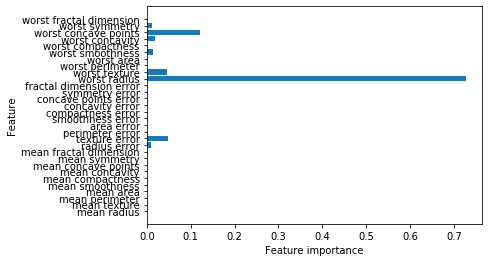

In [56]:
plot_feature_importances_cancer(tree)

Abbildung 2-28. Feature-Wichtigkeit, die aus einem Entscheidungsbaum berechnet wurden, der im Breast-Cancer Datensatz gelernt wurde.

Das Merkmal, welches im oberen Split verwendet wird ("worst radius"), bei weitem das wichtigste Merkmal ist. 

Dies bestätigt die Beobachtung bei der Analyse des Baumes, dass die erste Ebene die beiden Klassen bereits recht gut trennt. Wenn ein Merkmal jedoch eine geringe feature_importance hat, bedeutet das nicht, dass dieses Merkmal nicht informativ ist. Es bedeutet lediglich, dass das Merkmal nicht vom Algorithmus ausgewählt wurde. Dies ist beispielsweise der Fall, wenn ein anderes Merkmal die gleichen Informationen kodiert. Im Gegensatz zu den Koeffizienten in linearen Modellen sind Feature-Wichtigkeiten immer positiv und kodieren nicht, welche Klasse ein Feature anzeigt. 

**Decision Trees für die Regression**

Alle genannten Eigenschaften der Klassifikations-Variante des Decision-Trees sind auch für die Regressions-Variante gültig. Die Verwendung und Analyse von Regressionsbäumen ist sehr ähnlich wie bei Klassifikationsbäumen. Es gibt jedoch eine besondere Eigenschaft der Verwendung von baumbasierten Modellen für die Regression, die nachfolgend hervorgehoben wird. 


Der DecisionTreeRegressor (und alle anderen baumbasierten Regressionsmodelle) sind nicht in der Lage, Extrapolationen durchzuführen oder Vorhersagen außerhalb des Bereichs der Trainingsdaten zu treffen. 

Diese Eigenschaft soll anhand eines historischen Datensatzes mit Preisen für Computerspeicher (RAM) untersucht werden. Die Abbildung 2-31 zeigt den Datensatz mit dem Datum auf der x-Achse und dem Preis eines Megabytes RAM im entsprechenden Jahr auf der y-Achse:

Text(0, 0.5, 'Price in $/Mbyte')

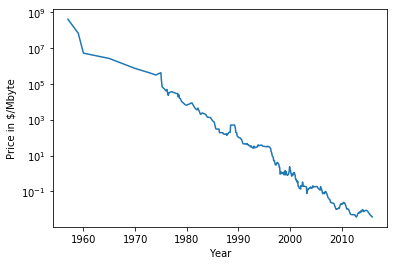

In [58]:
import pandas as pd
ram_prices = pd.read_csv("data/ram_price.csv")
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

Abbildung 2-31. Historische Entwicklung des RAM-Preises, dargestellt auf einer logarithmischen Skala.

Bei der logarithmischen Darstellung scheint die Beziehung linear zu sein und sollte daher bis auf einige Unebenheiten relativ einfach vorherzusagen sein. Wir werden eine Prognose für die Jahre nach 2000 auf der Grundlage der historischen Daten bis zu diesem Zeitpunkt erstellen, wobei das Datum das einzige Feature ist. Es werden zwei einfache Modelle vergleichen: Ein DecisionTree-Regressor und eine Linear-Regression. Die Preise werden logarithisch skaliert, sodass die Beziehung linear ist. Dies macht für den DecisionTreeRegressor keinen Unterschied, aber für die LinearRegression einen großen Unterschied. Nachdem die Modelle trainiert und Vorhersagen getroffen worden sind, kann eine Exponential-Map angewandt werden, um die Logarithmus-Transformation rückgängig zu machen. 



In [168]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# use historical data to forecast prices after the year 2000
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# predict prices based on date
X_train = data_train.date[:, np.newaxis]

# we use a log-transform to get a simpler relationship of data to target
y_train = np.log(data_train.price)
tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# predict on all data
X_all = ram_prices.date[:, np.newaxis]
pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# undo log-transform
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

Abbildung 2-32. Vergleich von Vorhersagen des Entscheidungsbaums und des linearen Regressionsmodells mit ground-truth:

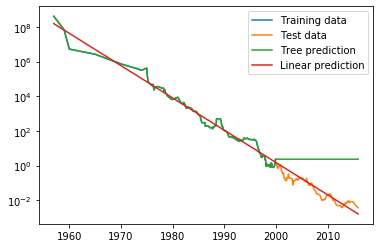

In [60]:
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend()

Abbildung 2-32. Vergleich von Vorhersagen eines linearen Modells und Vorhersagen eines Regressionsbaums auf den RAM-Preisdaten

Der Unterschied zwischen den Modellen ist eindeutig. Das lineare Modell liefert eine gute Prognose für die Testdaten (die Jahre nach 2000). Das Baummodell hingegen liefert perfekte Vorhersagen über die Trainingsdaten. Die Komplexität des Baums wurde beschränkt, weshalb Overfitting auftritt. Sobald wir jedoch den bekannten Datenbereich verlassen, prognostiziert das Modell einfach fortlaufend wieder den letzten bekannten Punkt. Sämtliche Baum-basierten Modelle sind nicht in der Lage zu extrapolieren, d.h. "neue" Vorhersagen zu generieren, für unbekannte Daten.

Stärken, Schwächen und Parameter 

Bei Entscheidungsbäumen existieren Parameter zur Steuerung der Modellkomplexität, Zur Definition von Prunigng-Parameter und zum vorzeitigen Abbruch der Baumenwicklung. Normalerweise wird eine der folgenden Strategien gewählt: 
- max_depth
- max_leaf_nodes 
- max_leaf_nodes 
- min_Proben_Blatt 

Die Wahl einer der oben genannten Strategien iist in der Regel ausreichend um Overfitting zu vermeiden. Entscheidungsbäume haben gegenüber vielen der bisher diskutierten Algorithmen zwei Vorteile: Das resultierende Modell kann leicht visualisiert und interpretiert werden (zumindest für kleinere Bäume), und die Algorithmen sind völlig unabhängig von der Skalierung der Daten. Da jedes Merkmal separat verarbeitet wird und die möglichen Aufteilungen der Daten nicht von der Skalierung abhängen, ist für Entscheidungsbaumalgorithmen keine Vorverarbeitung wie Normalisierung oder Standardisierung der Merkmale erforderlich. Entscheidungsbäume funktionieren insbesondere dann gut, wenn Features mit völlig unterschiedlichen Skalen vorliegen. Ebenso ist eine Mischung aus binären und kontinuierlichen Feature problemlos handhabbar. Der größte Nachteil von Entscheidungsbäumen ist, dass sie selbst bei Verwendung von Pre-Pruning zu Overfitting neigen und eine schlechte Generalisierungsleistung zu erzielen. Außerdem besitzen Decision Trees nicht die Fähigkeit der Extrapolation.

# 3. Vorbereitungsaufgabe <a name="vorbereitung"></a>

Arbeiten Sie das Jupyter Notebook "Praktikumsskript Uebung 2" sorgfältig durch. Führen Sie sämtliche Code-Zellen aus (inklusive unten stehender Zelle). Schicken Sie das Notebook als .ipynb oder .pdf vor dem Uebungstermin an ralf.gulde@isw.uni-stuttgart.de

In [2]:
name = ""
print("Mein Name lautet: ", name)

Mein Name lautet:  


# 4. Versuchsdurchführung <a name="versuch"></a>

### 4.1 Aufgabe 1 <a name="a1"></a>

#### 4.1.1 Lernziel der Aufgabe<a name="a1_1"></a>

In dieser Aufgabe lernen Sie wie Anomalien im Produktionsprozess auf der Grundlage von Sensordaten erkannt werden können.

#### 4.1.2 Beschreibung und Ablauf der Aufgabe <a name="a1_2"></a>

In dieser Übung verwenden Sie das Datenset "train_set_41". 

- Konditionieren Sie das Machine Learning Problem: Handelt es sich hierbei um ein Klassifikions- bzw. Regressionsproblem? Wie könnte der Output eine Algorithmus aussehen?

- Erstellen Sie ein Jupyter Notebook

- Laden und teilen Sie den Datensatz, sodass wie gewohnt ein Trainings- und Testset vorhanden ist.

- Verschaffen Sie sich einen Überblick über das Datenset. Gegebenenfalls ist eine Visualisierung hilfreich.

- Überlegen Sie welcher der im Vorbereitungsskirpt thematisierten Algorithmen auf das Problem angewendet werden können.

- Trainieren Sie ein Modell.

- Testen Sie das modell auf Underfitting bzw. Overfitting.

- Evaluieren Sie das Modell unter Verwendeung des Test-Sets "test_set_41" Bewerten Sie die Generalisierungsleistung.

- Überlegen Sie ob eine Form der Regularisierung hilfreich sein kann.


#### 4.1.3	Zielzustand der Aufgabe und Übertragung der Aufgabe in die Praxis <a name="a1_3"></a>

In der ersten Aufgabe sollen Anomalien (Materialfehler) erkannt werden. Ihnen steht hierzu der Datensatz dataset_41 zur Verfügung

### 4.2 Aufgabe 2 <a name="a2"></a>

#### 4.2.1 Lernziel der Aufgabe<a name="a2_1"></a>

#### 4.2.2 Beschreibung und Ablauf der Aufgabe <a name="a2_2"></a>

#### 4.2.3	Zielzustand der Aufgabe und Übertragung der Aufgabe in die Praxis <a name="a2_3"></a>

### 4.3 Aufgabe 3 <a name="a3"></a>

#### 4.3.1 Lernziel der Aufgabe<a name="a3_1"></a>

#### 4.3.2 Beschreibung und Ablauf der Aufgabe <a name="a3_2"></a>

#### 4.3.3	Zielzustand der Aufgabe und Übertragung der Aufgabe in die Praxis <a name="a3_3"></a>